In [2]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [3]:
#Load and Explore the Dataset

from tensorflow.keras.utils import load_img, img_to_array

def load_images(base_path):
    categories = ['CXR', 'AbdomenCT', 'HeadCT', 'ChestCT', 'Hand']
    data = []
    labels = []
    img_size = (128, 128)  # Resize all images to a fixed size
    
    for i, category in enumerate(categories):
        folder_path = os.path.join(base_path, category)
        for file_name in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file_name)
            img = load_img(file_path, target_size=img_size)  # Load image
            img_array = img_to_array(img) / 255.0  # Normalize pixel values to [0, 1]
            data.append(img_array)
            labels.append(i)  # Assign numerical label
            
    return np.array(data), np.array(labels)

# Path to the dataset
dataset_path = "C:\\Users\\sahaa\\Downloads\\CNN_dataset"
data, labels = load_images(dataset_path)

print("data loading completed")

data loading completed


In [5]:
from sklearn.model_selection import train_test_split

# Split data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(data, labels, test_size=0.3, stratify=labels, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

print(f"Training set size: {len(X_train)}, Validation set size: {len(X_val)}, Test set size: {len(X_test)}")


Training set size: 35000, Validation set size: 7500, Test set size: 7500


In [6]:
# Data normalization
from sklearn.preprocessing import StandardScaler

# Normalize the data 
scaler = StandardScaler()

# Flatten the data temporarily for normalization
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_val_flat = X_val.reshape(X_val.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

X_train_flat = scaler.fit_transform(X_train_flat)
X_val_flat = scaler.transform(X_val_flat)
X_test_flat = scaler.transform(X_test_flat)

# Reshape back to original dimensions
X_train = X_train_flat.reshape(X_train.shape)
X_val = X_val_flat.reshape(X_val.shape)
X_test = X_test_flat.reshape(X_test.shape)

print("Data normalized.")


Data normalized.


In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(np.unique(labels)), activation='softmax')  # Output layer based on the number of classes
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print("CNN model built.")

CNN model built.


In [10]:
# Train the CNN model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,  # You can adjust based on performance
    batch_size=32,
    shuffle=True
)

print("Model training complete.")

Epoch 1/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 242s 220ms/step - accuracy: 0.9893 - loss: 0.0384 - val_accuracy: 0.9965 - val_loss: 0.0128
Epoch 2/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 211s 192ms/step - accuracy: 0.9971 - loss: 0.0106 - val_accuracy: 0.9987 - val_loss: 0.0042
Epoch 3/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 211s 193ms/step - accuracy: 0.9965 - loss: 0.0124 - val_accuracy: 0.9977 - val_loss: 0.0091
Epoch 4/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 221s 202ms/step - accuracy: 0.9978 - loss: 0.0084 - val_accuracy: 0.9991 - val_loss: 0.0042
Epoch 5/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 210s 192ms/step - accuracy: 0.9975 - loss: 0.0078 - val_accuracy: 0.9984 - val_loss: 0.0118
Epoch 6/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 210s 192ms/step - accuracy: 0.9984 - loss: 0.0065 - val_accuracy: 0.9991 - val_loss: 0.0061
Epoch 7/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 213s 195ms/step - accuracy: 0.9981 - loss: 0.0083 - val_accuracy: 0.9989 - val_loss: 0.0093
Epoch 8/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 212s 194ms/step - ac

In [11]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

235/235 ━━━━━━━━━━━━━━━━━━━━ 20s 83ms/step - accuracy: 0.9978 - loss: 0.0112
Test Loss: 0.0084
Test Accuracy: 99.84%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


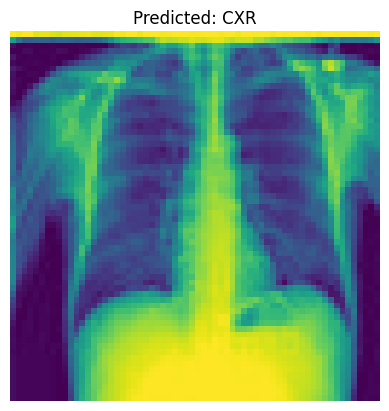

Predicted Class: CXR


In [13]:
# Load a single image for prediction
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np  # Make sure numpy is imported

test_image_path = r"C:\Users\sahaa\Downloads\CNN_dataset\Test Images\cxr_test.jpeg"
test_image = load_img(test_image_path, target_size=(128, 128))
test_image_array = img_to_array(test_image) / 255.0  # Normalize image
test_image_array = np.expand_dims(test_image_array, axis=0)  # Add batch dimension

# Predict the class
predicted_label = model.predict(test_image_array).argmax()

# Map the label to class name
class_map = {0: 'CXR', 1: 'AbdomenCT', 2: 'HeadCT', 3: 'ChestCT', 4: 'Hand'}  # Adjust as per your dataset
predicted_class = class_map[predicted_label]

# Display the prediction with a colorful representation
plt.imshow(load_img(test_image_path, color_mode="grayscale"), cmap='viridis')  # Apply a colormap like 'viridis'
plt.title(f"Predicted: {predicted_class}")
plt.axis("off")
plt.show()

print(f"Predicted Class: {predicted_class}")